# Handwritten Digits Classification Using Neural Network

In [1]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import datasets, models, layers
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [6]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
y_train[1]

0

In [9]:
def plot_image(x, y, index):
    plt.figure(figsize=(5,2))
    plt.matshow(x[index])
    plt.xlabel(y[index])
    plt.show()

<Figure size 500x200 with 0 Axes>

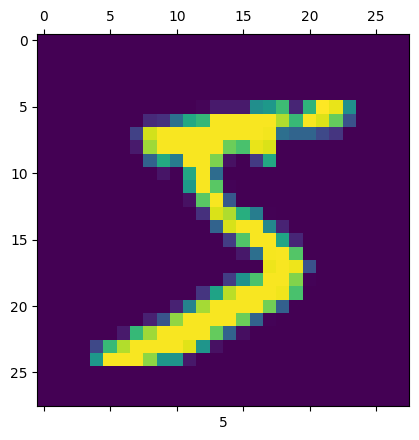

In [10]:
plot_image(x_train, y_train, 0)

In [11]:
x_train = x_train/255
x_test = x_test/255 

In [12]:
x_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
ann = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])
ann.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
ann.fit(x_train, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 97s 51ms/step - accuracy: 0.9082 - loss: 0.2967
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 98s 52ms/step - accuracy: 0.9740 - loss: 0.0836
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 95s 51ms/step - accuracy: 0.9825 - loss: 0.0565
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 49ms/step - accuracy: 0.9872 - loss: 0.0411
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 93s 49ms/step - accuracy: 0.9895 - loss: 0.0377


In [14]:
ann.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9785 - loss: 0.0984


[0.08218027651309967, 0.9815999865531921]

In [15]:
y_pred = ann.predict(x_test)
y_pred[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


array([1.20770765e-05, 4.28339317e-02, 1.07080508e-02, 4.39478606e-01,
       1.98757742e-04, 3.29746143e-03, 4.17735146e-06, 9.99992311e-01,
       3.91363195e-04, 8.47353399e-01], dtype=float32)

In [16]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [17]:
y_pred_labels[0]

7

In [18]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels) 


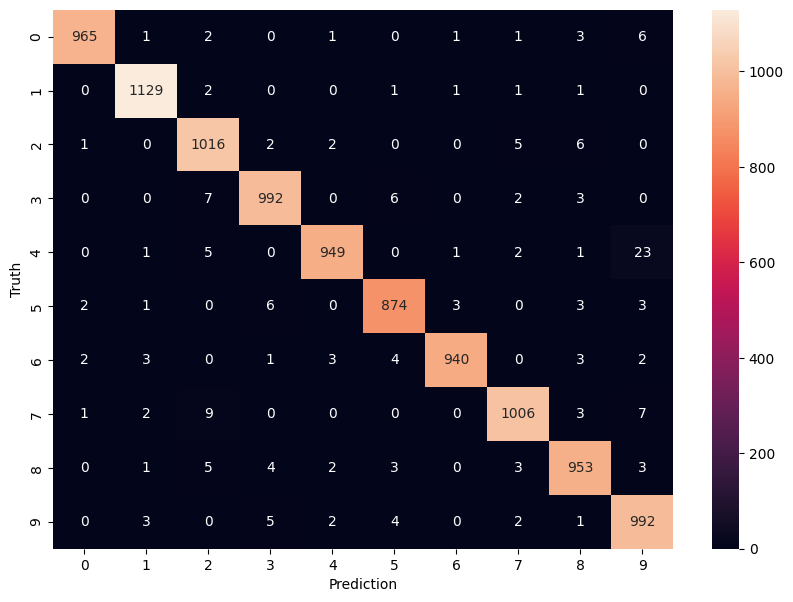

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()

In [20]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

In [21]:
print("Classification report: \n", classification_report(y_test, y_pred_labels))

Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [22]:
precision_score(y_test, y_pred_labels, average='weighted')

0.9817219555979455

In [23]:
recall_score(y_test, y_pred_labels, average='weighted')

0.9816

In [24]:
f1_score(y_test, y_pred_labels, average='weighted')

0.9816181527360631

# Using CNN

In [25]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [26]:
x_test.shape, y_train.shape

((10000, 28, 28), (60000,))

In [27]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [28]:
cnn = models.Sequential([

    #cnn
    layers.Conv2D(filters=32, input_shape=(28,28,1), kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    
    #Dense
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
cnn.fit(x_train, y_train, epochs=5) 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9090 - loss: 0.3022
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.9821 - loss: 0.0571
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9898 - loss: 0.0348
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9928 - loss: 0.0229
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9948 - loss: 0.0173


In [29]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9838 - loss: 0.0504


[0.04125574976205826, 0.987500011920929]

In [30]:
y_pred = cnn.predict(x_test)
y_pred[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


array([4.0187952e-03, 1.5772400e-02, 4.5802510e-01, 8.6319125e-01,
       4.0386529e-03, 9.3879469e-04, 2.5867372e-08, 9.9999869e-01,
       6.2259767e-02, 5.7286984e-01], dtype=float32)

In [31]:
y_pred_labels = [np.argmax(i) for i in y_pred] 
y_pred_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [32]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)

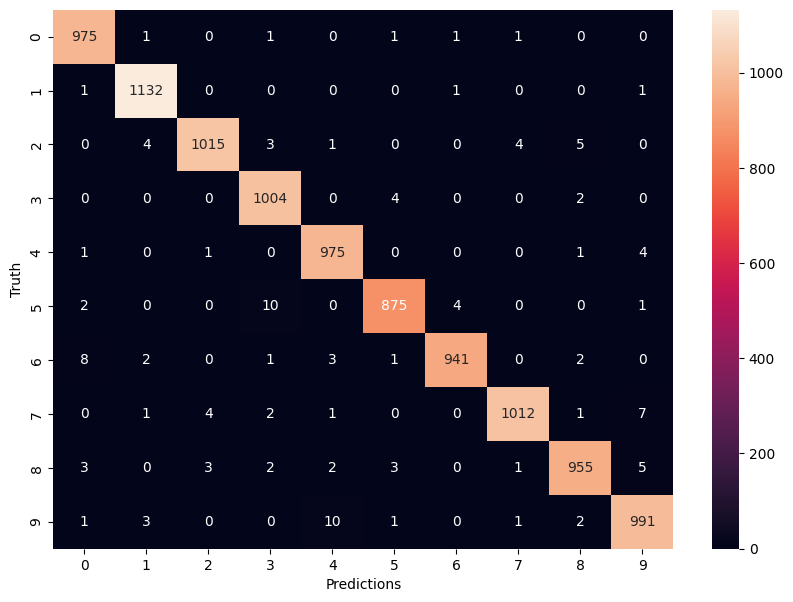

In [33]:
plt.figure(figsize=(10,7)) 
sns.heatmap(cm, annot=True, fmt='d') 
plt.xlabel('Predictions')
plt.ylabel('Truth') 
plt.show()

In [34]:
print("Classification report: \n", classification_report(y_test, y_pred_labels))

Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [35]:
precision_score(y_test, y_pred_labels, average='weighted')

0.9875305831576726

In [36]:
recall_score(y_test, y_pred_labels, average='weighted')

0.9875

In [37]:
f1_score(y_test, y_pred_labels, average='weighted')

0.9874949580460461